In [33]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.optimize import curve_fit

plt.rcParams['font.family']='serif'

In [69]:
Energy = '16.75'
name_folder = f'UMPA_at_{Energy}'
Npixeles=256
NI=1 #Número de imágenes RAW
NF=1 #Número de imágenes FF
NThr=1 #Número de imágenes contenidas dentro de cada .raw: La primera es la dada por el canal 0 y \
#la segunda es la dada por el canal 1.
nameSAM="Spk_YES_Poly_d0.1m_a15um_p62um_step-4.2_dith23.25_"
nameREF ="SpkR467_00_16.75kev__d0.1m_a15um_p62um_step-4.2_dith23.25_" 
nameFF="SVspFF_16.75_kev__d0.1m_a15um_p62um_step-4.2_dith23.25_"
    


In [70]:
def ImagenesR(name,Npixeles):
    I=[]
    for k in range(0,len(name),Npixeles*Npixeles):
        Im=np.zeros((Npixeles,Npixeles))
        for j in range(Npixeles):
            for i in range(Npixeles):
                Im[j,i]=name[i+Npixeles*j+k]
        I.append(Im)
    return I
def Imagenes(name,Npixeles,NI):
    D=[]
    for i in range(1,NI+1):
        Raw=np.fromfile(name+"{}.raw".format(i), dtype='float32')
        K=ImagenesR(Raw,Npixeles)
        D.append(K)
    return D
def ImagenesA(name,Npixeles,NI,NThr):
    A=[]
    for i in range(NThr):
        Mean=np.zeros((Npixeles, Npixeles))
        for j in range (NI):
            Mean=Mean+name[j][i]
        A.append(Mean)
    return A
def CNR(meanS,meanB,stdB):
    CNR = (meanB - meanS)/stdB
    return CNR
SAMP=Imagenes(nameSAM,Npixeles,NI)
SAMPA=ImagenesA(SAMP,Npixeles,NI,NThr)
REF=Imagenes(nameREF,Npixeles,NI)
REFA=ImagenesA(REF,Npixeles,NI,NThr)
FF=Imagenes(nameFF,Npixeles,NF)
FFA=ImagenesA(FF,Npixeles,NF,NThr)



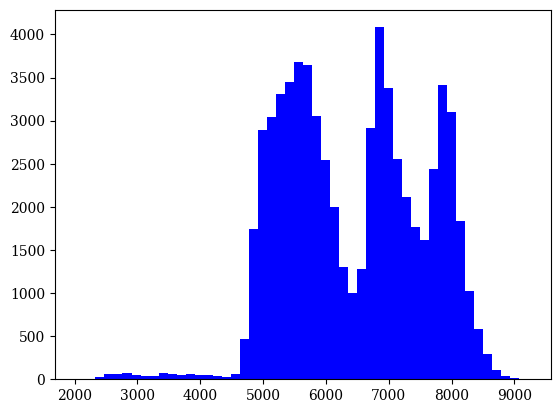

In [71]:
Sampc=[]
Refc=[]
for i in range(NThr):
    SAMPC=SAMPA[i]#/FFA[i]
    REFC = REFA[i]/FFA[i]
    Sampc.append(SAMPC)
    Refc.append(REFC)
    
k=0
ImG=plt.hist(np.ravel(Sampc[k]),bins=50,color="blue")

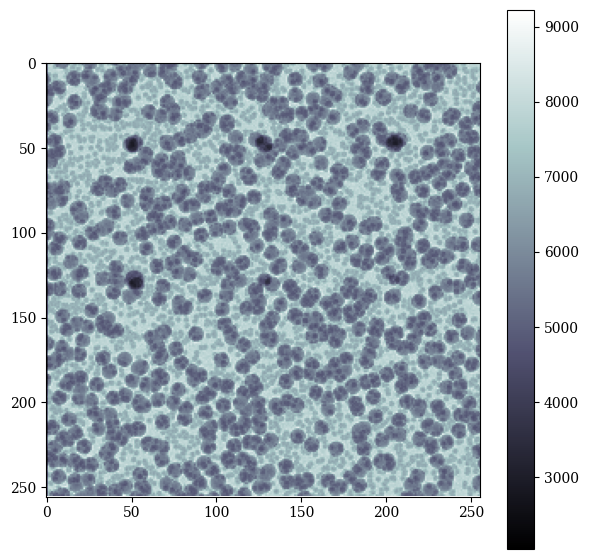

In [72]:
plt.figure(figsize=(7,7))
plt.imshow(Sampc[k], cmap="bone")
plt.colorbar()

In [73]:
sigma = np.std(Sampc[k][10:70,10:70])
mean = np.mean(Sampc[k][10:70,10:70])
vis = sigma/mean *100
vis

15.93157946413568

(1, 256, 256)

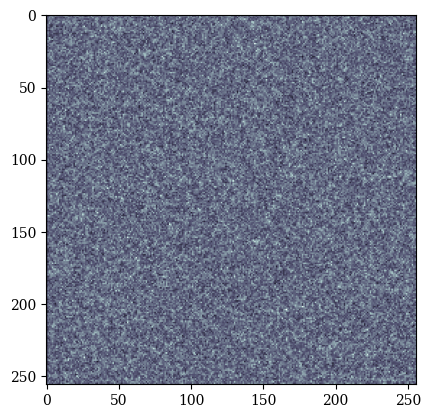

In [68]:
S = []
S.append(Sampc[k])
S = np.array(S)
plt.imshow(S[0], cmap="bone")
S.shape